In [76]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import ravel
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV  # For optimization


In [2]:
iris_df = load_iris()

In [17]:
iris_df.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.data, iris_df.target, test_size=0.3, random_state=2)

In [5]:
## Pipeline description
# 1. Data Preprocessing by using Standard Scaler
# 2. Reducing the dimesion of the PCA
# 3. Apply Classifier

In [25]:

pipeline_lr = Pipeline(steps=[("scalar1", StandardScaler()),
                              ("pca1", PCA(n_components=2)),
                              ("lr_classifier", LogisticRegression())])


In [26]:
pipeline_dt = Pipeline(steps=[("scaler2", StandardScaler()),
                              ("pca2", PCA(n_components=2)),
                              ("dt_classifier", DecisionTreeClassifier())])


In [27]:
pipeline_rf = Pipeline(steps=[("scaler3", StandardScaler()), 
                              ("pca3", PCA(n_components=2)), 
                              ("rf_classifier", RandomForestClassifier())])


In [28]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

In [29]:
best_accuracy   = 0.0
best_classifier = 0
best_pipeline   = " "

In [31]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: "Logistic Regression", 1: "Decision Tree", 2: "Random Forest"}

# Fit the Pipeline
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [34]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test)))

Logistic Regression Test Accuracy: 0.9111111111111111
Decision Tree Test Accuracy: 0.9333333333333333
Random Forest Test Accuracy: 0.9333333333333333


In [39]:
for i, model in enumerate(pipelines):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_classifier = i
        
print("Classifier with the best Accuracy: {}".format(pipe_dict.get(best_classifier)))


Classifier with the best Accuracy: Decision Tree


## Using the Ecoli Dataset from the UCI Machine Learning Mastery
#### https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

In [53]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep='\s+',
    header=None)
print(df.head())
## We’ll ignore the first column, which specifies the sequence name. 
# The last column is the class label. Let’s separate the features from the class label 
# and split the dataset into 2/3 training instances and 1/3 test examples.


            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


In [54]:
# The data matrix X
X = df.iloc[:, 1:-1]
# The labels
y = (df.iloc[:, -1:])

# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

print(X_train.shape)
print(X_test.shape)



(224, 7)
(112, 7)


In [55]:
##  For baseline Performance on the K-nearest neighbours 
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train, y_train)))
print('Test set score: ' + str(knn.score(X_test, y_test))) 
## the trudgement is based on the score or accuracy results of the test dataset, 
# showing whether the classifie has generalized or not 


Training set score: 0.9017857142857143
Test set score: 0.8482142857142857


In [56]:
pipeline_knn = Pipeline(steps=[("scaler", StandardScaler()),
                               ("selector", VarianceThreshold()),
                               ("classifier", KNeighborsClassifier())])

# Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().
# Feature selector: Use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.
# Classifier: KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.


In [58]:
pipeline_knn.fit(X_train, y_train)

print('Training set score: ' + str(pipeline_knn.score(X_train, y_train)))
print('Test set score: ' + str(pipeline_knn.score(X_test, y_test)))


Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


### Optimizing and Tuning the Pipeline


In [60]:
## We can search for the best scalers. Instead of just the StandardScaler(), we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().
## We can search for the best variance threshold to use in the selector, i.e., VarianceThreshold().
## We can search for the best value of k for the KNeighborsClassifier().
##  Note the following:
#### The scaler has no double underscore, as we have specified a list of objects there.
#### We would search for the best threshold for the selector, i.e., VarianceThreshold(). Hence we have specified a list of values[0, 0.0001, 0.001, 0.5] to choose from.
#### Different values are specified for the n_neighbors, p and leaf_size parameters of the KNeighborsClassifier().

### Imortant: It is worth remarking the convention adopted to name the parameters: name of the pipeline step, followed by a double underscore (__), 
###           then finally the name of the parameter within the step.

parameters = {"scaler":[StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              "selector__threshold": [0, 0.001, 0.01],
              "classifier__n_neighbors": [1, 3, 5, 7, 10], 
              "classifier__p": [1, 2], 
              "classifier__leaf_size": [1, 5, 10, 15]}

### GridSearchCV also allows to optimize lists of parameter dictionaries, which solves this issue as well:
# params = [
#     {'scaler': scalers_to_test,
#      'reduce_dim': [PCA()],
#      'reduce_dim__n_components': n_features_to_test,
#      'regressor__alpha': alpha_to_test},

#     {'scaler': scalers_to_test,
#      'reduce_dim': [SelectKBest(f_regression)],
#      'reduce_dim__k': n_features_to_test,
#      'regressor__alpha': alpha_to_test}
# ]


In [61]:
grid = GridSearchCV(pipeline_knn, parameters, cv=2)
grid.fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))


C:\Users\SAIFUALLAH\anaconda3\envs\beamng\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


Training set score: 0.8928571428571429
Test set score: 0.8571428571428571


In [73]:

# Access the best set of parameters
best_params = grid.best_params_
print("best_params: ", best_params)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print("best_pipe: ", best_pipe)

best_score = grid.best_score_
print("best_score: ", best_score)


best_params:  {'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}
best_pipe:  Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7))])
best_score:  0.84375


In [74]:
# result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df = pd.DataFrame.from_dict(grid.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004489,4.973412e-04,0.004986,1.192093e-07,1,1,1,StandardScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.830357,0.767857,0.799107,0.031250,329
1,0.003989,1.192093e-07,0.004488,4.992485e-04,1,1,1,StandardScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.830357,0.767857,0.799107,0.031250,329
2,0.003989,1.192093e-07,0.004488,4.981756e-04,1,1,1,StandardScaler(),0.01,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.830357,0.767857,0.799107,0.031250,329
3,0.002992,1.192093e-07,0.004987,1.192093e-07,1,1,1,MinMaxScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.848214,0.741071,0.794643,0.053571,361
4,0.004488,4.991293e-04,0.005485,1.496315e-03,1,1,1,MinMaxScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.848214,0.741071,0.794643,0.053571,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.003491,4.984140e-04,0.005984,3.576279e-07,15,10,2,Normalizer(),0.001,"{'classifier__leaf_size': 15, 'classifier__n_n...",0.812500,0.839286,0.825893,0.013393,73
476,0.005001,1.633167e-05,0.004989,2.622604e-06,15,10,2,Normalizer(),0.01,"{'classifier__leaf_size': 15, 'classifier__n_n...",0.687500,0.741071,0.714286,0.026786,449
477,0.003973,9.806156e-04,0.006502,1.514792e-03,15,10,2,MaxAbsScaler(),0,"{'classifier__leaf_size': 15, 'classifier__n_n...",0.821429,0.803571,0.812500,0.008929,201
478,0.003989,3.576279e-07,0.005486,4.991293e-04,15,10,2,MaxAbsScaler(),0.001,"{'classifier__leaf_size': 15, 'classifier__n_n...",0.821429,0.803571,0.812500,0.008929,201


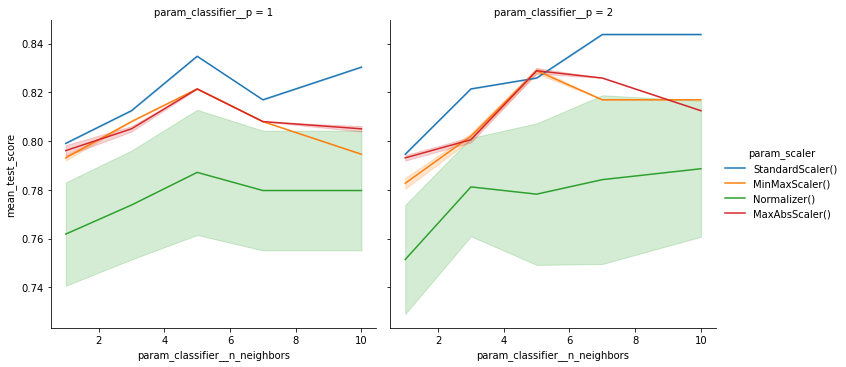

In [80]:
## Let’s see how n_neighbors affect the performance for different scalers and for different values of p.
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__p')
plt.show()


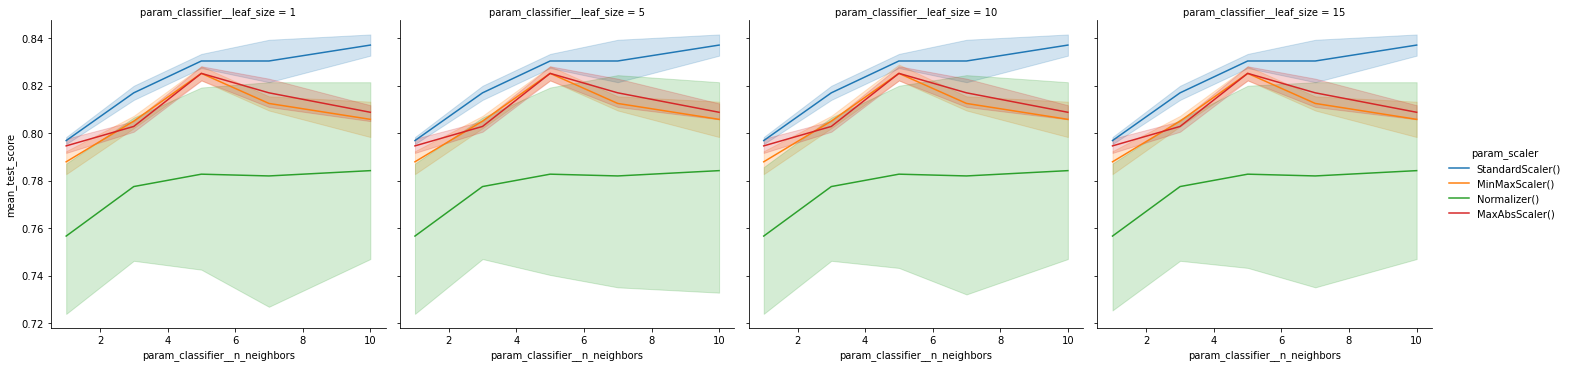

In [81]:
sns.relplot(data=result_df,
            kind="line",
            x="param_classifier__n_neighbors",
            y="mean_test_score",
            hue="param_scaler",
            col="param_classifier__leaf_size")

plt.show()